<a href="https://colab.research.google.com/github/sirius70/NLP_HW4/blob/main/IE7275_Quiz2_Fall2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IE7275: Data Mining in Engineering
## Quiz 2 – Fall 2025

This quiz contains **20 graduate-level Python questions**, covering topics in data understanding and exploration.  

Topics include:  
- Python basics (variables, loops, functions, data structures)  
- NumPy arrays and statistics  
- Pandas DataFrame manipulation  
- Data visualization with Matplotlib & Seaborn  
- Descriptive statistics & skewness  
- Handling missing values & outliers  
- Encoding categorical variables  
- Class imbalance & evaluation metrics  
- Correlation and feature interactions  

---

**Instructions:**  
- Answer all questions in Python.  
- Show outputs clearly (tables/plots where requested).  
- Submit your completed notebook as a PDF on Canvas.  
- Time allowed: 90 minutes.  


### Dataset 1: Iris Dataset (for Q1–Q5, Q19–Q20)
Load the dataset:

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Q1.**  
Display Python version and check versions of `numpy`, `pandas`, and `matplotlib`.  

**Q2.**  
Compute the average sepal_length and petal_length for each species in the Iris dataset.  

**Q3.**  
Plot a histogram of petal_width for all species. Compare its distribution across species.  

**Q4.**  
Compute and visualize the correlation matrix of the Iris numerical features using a heatmap.  

**Q5.**  
Generate a scatter plot matrix (pairplot) for all numeric features, colored by species.  


In [2]:
# Q1
import sys
import matplotlib

print("Python version: ", sys.version)
print("NumPy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Matplotlib version: ", matplotlib.__version__)



Python version:  3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
NumPy version:  2.0.2
Pandas version:  2.2.2
Matplotlib version:  3.10.0


In [3]:
# Q2
avg_len = iris.groupby('species')[['sepal_length', 'petal_length']].mean()
print(avg_len)



            sepal_length  petal_length
species                               
setosa             5.006         1.462
versicolor         5.936         4.260
virginica          6.588         5.552


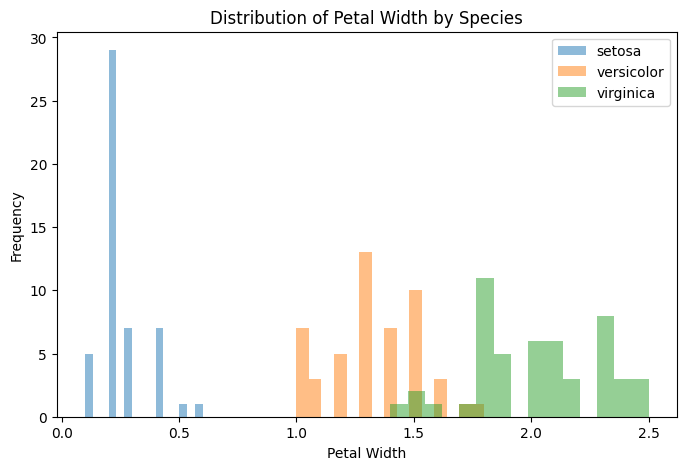

In [4]:
# Q3
plt.figure(figsize=(8, 5))

for sp in iris['species'].unique():
  data = iris[iris['species'] == sp]['petal_width']
  plt.hist(data, bins=15, alpha=0.5, label=sp)

plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Distribution of Petal Width by Species')
plt.legend()
plt.show()

Comparison:

*   Setosa: Petal widths are very small and tightly clustered (around 0.1-0.6). This is almost no overlap with other species.
*   Versicolor: Petal width fall in a medium range (around 1.0-1.8) with some overlap with Virginica.

*   Virginica: Petal widths are the largest and most spread out (approximately 1.4-2.5).







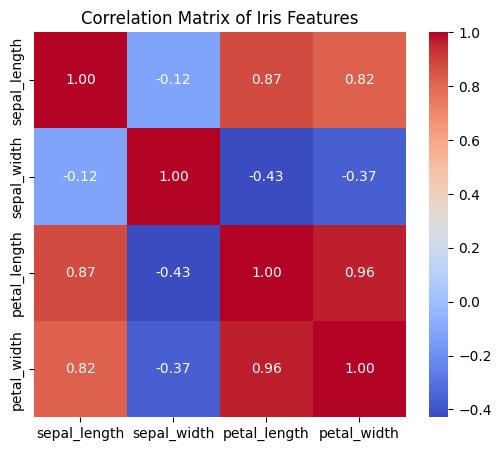

In [5]:
# Q4
num_features = iris.select_dtypes(include=[np.number])
corr_matrix = num_features.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Features')
plt.show()


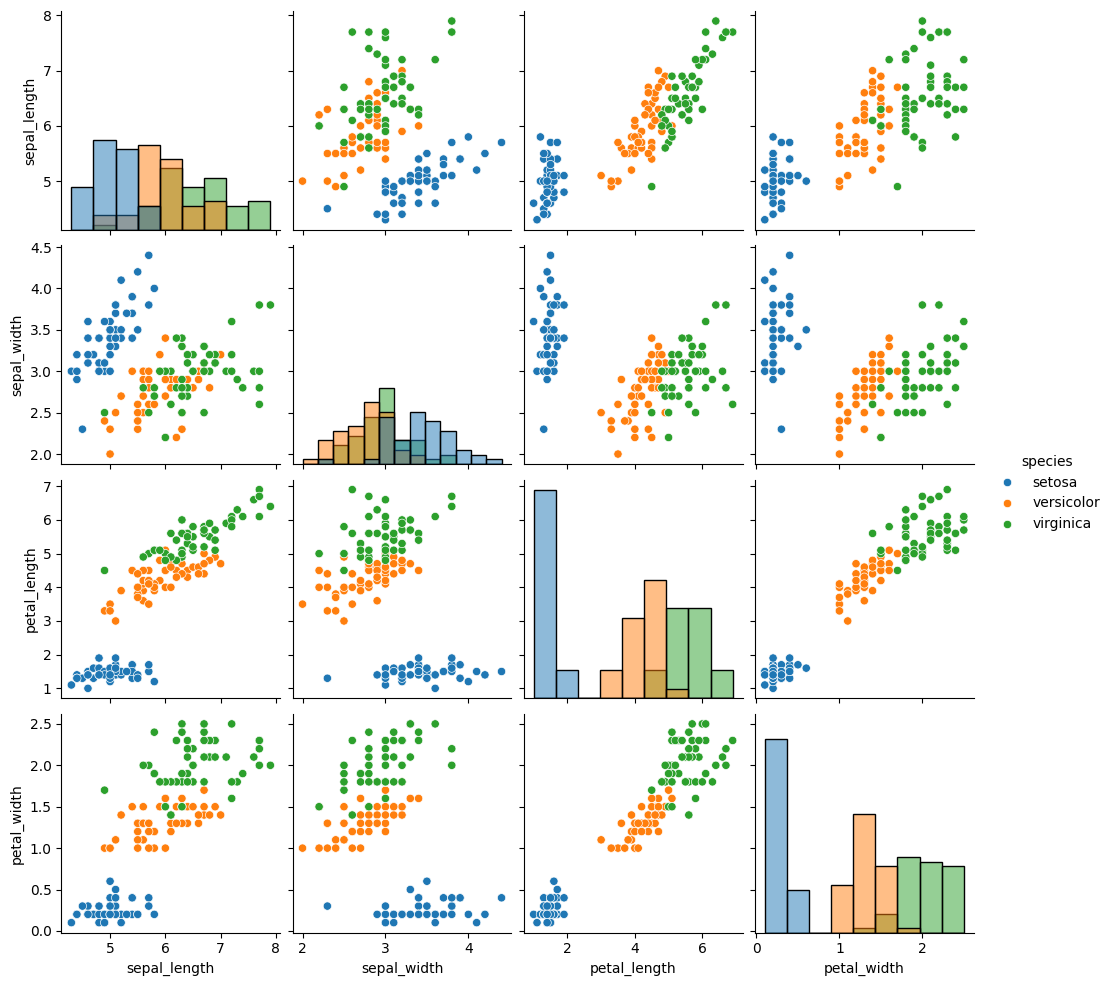

In [6]:
# Q5
sns.pairplot(iris, hue='species', diag_kind='hist')
plt.show()

### Dataset 2: Random Numerical Data (for Q6–Q10)
Generate the dataset:

In [7]:
np.random.seed(42)
num_data = pd.DataFrame({
    'A': np.random.normal(50, 10, 100),
    'B': np.random.randint(0, 100, 100),
    'C': np.random.uniform(0, 1, 100)
})
num_data.head()


,A,B,C
0,54.967142,8,0.846661
1,48.617357,61,0.856324
2,56.476885,36,0.404508
3,65.230299,96,0.887770
4,47.658466,50,0.850928


**Q6.**  
Create a NumPy array of shape (5,4) with random integers between 1 and 20. Compute its mean and standard deviation.  

**Q7.**  
For dataset `num_data`, compute mean, median, variance, and range for column A.  

**Q8.**  
Plot a boxplot of column B. Identify potential outliers.  

**Q9.**  
Compute skewness of column A. Plot a histogram with KDE overlay. Interpret whether the data is positively or negatively skewed.  

**Q10.**  
Plot histograms of column C with 10 bins, 30 bins, and a KDE curve. Compare the visual differences.  


In [8]:
# Q6

# create array
arr = np.random.randint(1, 21, size=(5, 4))
print("Array: \n", arr)

# mean and standard deviation computation
mean_val = arr.mean()
std_val = arr.std()

print("\nMean:", mean_val)
print("Standard Deviation:", std_val)


Array: 
 [[12 12  5  7]
 [ 4  6 13 20]
 [15  3  8 20]
 [16 13 18 10]
 [19 17 19  5]]

Mean: 12.1
Standard Deviation: 5.647123161398199


In [9]:
# Q7

# mean
meanA = num_data['A'].mean()

# median
medianA = num_data['A'].median()

# variance
varianceA = num_data['A'].var()

# range
rangeA = num_data['A'].max() - num_data['A'].min()

print("Mean of A:", meanA)
print("Median of A:", medianA)
print("Variance of A:", varianceA)
print("Range of A:", rangeA)


Mean of A: 48.96153482605907
Median of A: 48.73043708220287
Variance of A: 82.476989363016
Range of A: 44.72023288598683


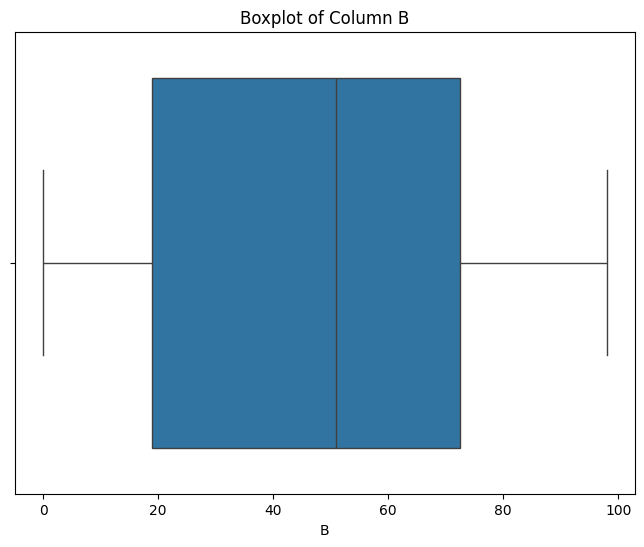

Potential outliers:
 []


In [10]:
# Q8

plt.figure(figsize=(8, 6))
sns.boxplot(x=num_data['B'])
plt.title('Boxplot of Column B')
plt.xlabel('B')
plt.show()

# potential outliers
Q1 = num_data['B'].quantile(0.25)
Q3 = num_data['B'].quantile(0.75)
IQR = Q3 - Q1
outliers = num_data[(num_data['B'] < Q1 - 1.5*IQR) | (num_data['B'] > Q3 + 1.5*IQR)]
print("Potential outliers:\n", outliers['B'].values)

Skewness of column A: -0.17526772024434067


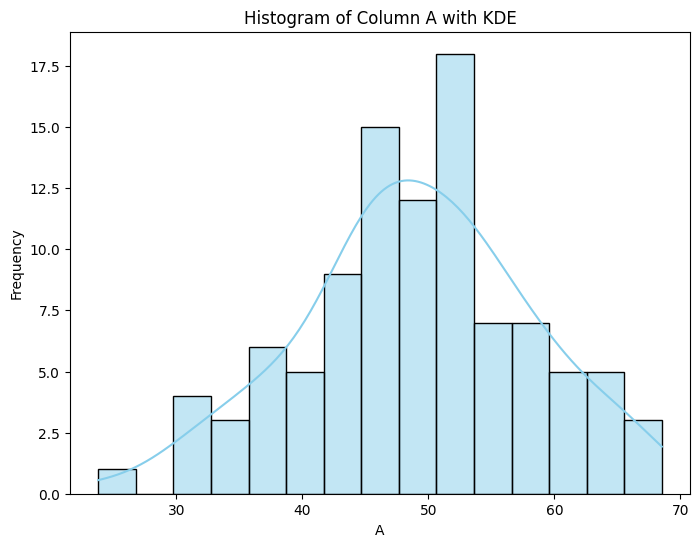


The data is negatively skewed (left-skewed).


In [11]:
# Q9

from scipy.stats import skew

# skewness
skewness = skew(num_data['A'])
print("Skewness of column A:", skewness)

# histogram with KDE
plt.figure(figsize=(8,6))
sns.histplot(num_data['A'], kde=True, bins=15, color='skyblue')
plt.title('Histogram of Column A with KDE')
plt.xlabel('A')
plt.ylabel('Frequency')
plt.show()

# interpretation
if skewness > 0:
    print("\nThe data is positively skewed (right-skewed).")
elif skewness < 0:
    print("\nThe data is negatively skewed (left-skewed).")
else:
    print("\nThe data is approximately symmetric.")

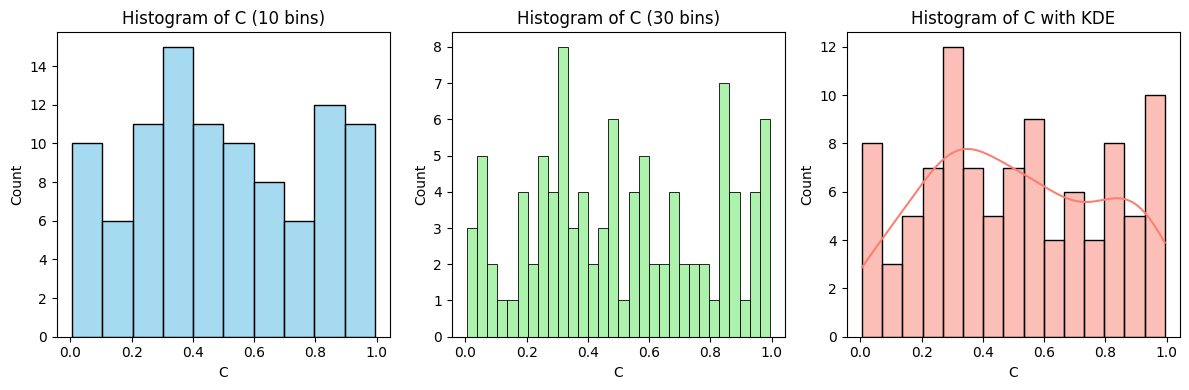

In [12]:
# Q10

# histogram with 10 bins
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(num_data['C'], bins=10, color='skyblue')
plt.title('Histogram of C (10 bins)')

# histogram with 30 bins
plt.subplot(1,3,2)
sns.histplot(num_data['C'], bins=30, color='lightgreen')
plt.title('Histogram of C (30 bins)')

# histogram with KDE
plt.subplot(1,3,3)
sns.histplot(num_data['C'], kde=True, bins=15, color='salmon')
plt.title('Histogram of C with KDE')

plt.tight_layout()
plt.show()

### Dataset 3: Student Scores Data (for Q11–Q15)
Generate the dataset:

In [13]:
students = pd.DataFrame({
    'Name': ['Alice','Bob','Charlie','David','Eva','Frank','Grace','Hannah'],
    'Math': [75,58,90,45,83,95,67,72],
    'Reading': [65,70,85,50,90,88,76,60],
    'Gender': ['F','M','M','M','F','M','F','F'],
    'Passed': [1,0,1,0,1,1,1,1]
})
students.head()


,Name,Math,Reading,Gender,Passed
0,Alice,75,65,F,1
1,Bob,58,70,M,0
2,Charlie,90,85,M,1
3,David,45,50,M,0
4,Eva,83,90,F,1


**Q11.**  
Write a Python function that takes Math and Reading scores from the `students` dataset and returns their average. Apply it for each student.  

**Q12.**  
One-hot encode the `Gender` column. Show the transformed DataFrame.  

**Q13.**  
Count the frequency of Passed vs Not Passed students. Plot the distribution using a bar chart.  

**Q14.**  
Create boxplots comparing Math scores grouped by Gender. Interpret whether there is a visible difference.  

**Q15.**  
For the Math column, combine histogram, KDE, and boxplot into one figure. Provide an interpretation report.  


In [14]:
# Q11

# function to calculate average score
def average_score(math, reading):
    return (math + reading) / 2

# apply function for each student
students['Average'] = students.apply(lambda row: average_score(row['Math'], row['Reading']), axis=1)

print(students[['Name', 'Math', 'Reading', 'Average']])

      Name  Math  Reading  Average
0    Alice    75       65     70.0
1      Bob    58       70     64.0
2  Charlie    90       85     87.5
3    David    45       50     47.5
4      Eva    83       90     86.5
5    Frank    95       88     91.5
6    Grace    67       76     71.5
7   Hannah    72       60     66.0


In [15]:
# Q12

# one-hot encode Gender column
students_encoded = pd.get_dummies(students, columns=['Gender'])

print(students_encoded)

      Name  Math  Reading  Passed  Average  Gender_F  Gender_M
0    Alice    75       65       1     70.0      True     False
1      Bob    58       70       0     64.0     False      True
2  Charlie    90       85       1     87.5     False      True
3    David    45       50       0     47.5     False      True
4      Eva    83       90       1     86.5      True     False
5    Frank    95       88       1     91.5     False      True
6    Grace    67       76       1     71.5      True     False
7   Hannah    72       60       1     66.0      True     False


In [16]:
# Q13

# count frequency
passed_counts = students['Passed'].value_counts()
print(passed_counts)

Passed
1    6
0    2
Name: count, dtype: int64


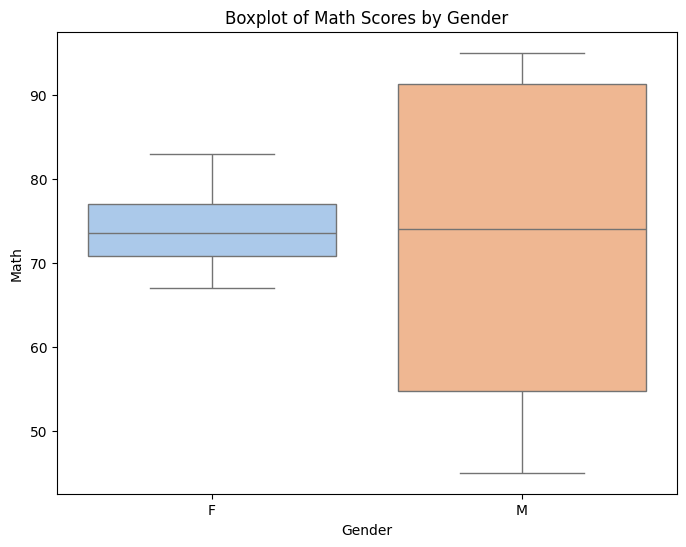

In [17]:
# Q14

# boxplot of Math scores grouped by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Math', data=students, hue='Gender', palette='pastel')
plt.title('Boxplot of Math Scores by Gender')
plt.show()

Interpretation:
Both the genders have similar median math scores, but male scores are more spread out, showing a it more variation

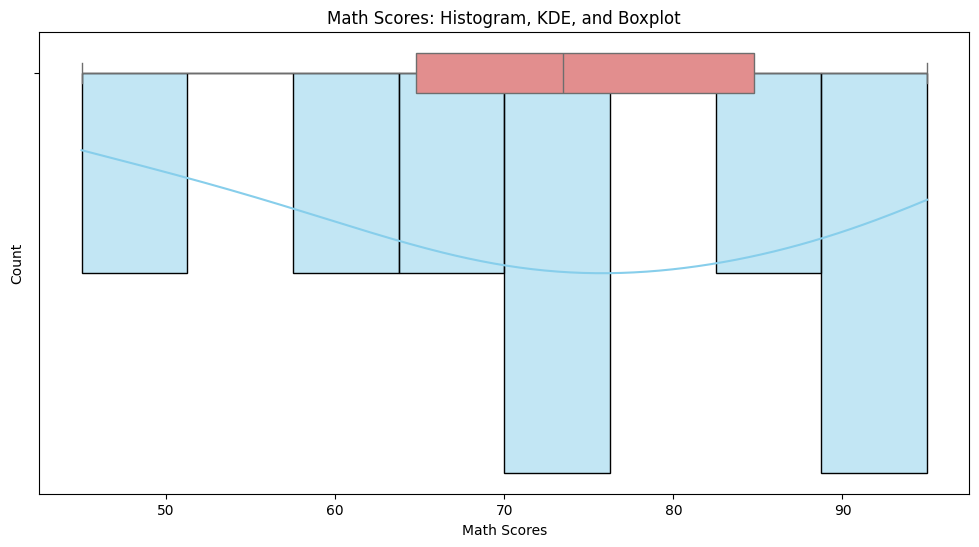

In [18]:
# Q15

plt.figure(figsize=(12,6))

# boxplot
sns.boxplot(x=students['Math'], width=0.2, color='lightcoral', fliersize=5)

# histogram + KDE
sns.histplot(students['Math'], kde=True, bins=8, color='skyblue', edgecolor='black')
plt.title('Math Scores: Histogram, KDE, and Boxplot')


plt.xlabel('Math Scores')
plt.show()


Interpretation:
*   Histogram: Shows most students scored 65–90, giving a clear frequency overview.

*   KDE: Smooth curve highlights the distribution peak around 70–80, showing the shape more clearly.

*   Boxplot: Shows the median (~74), quartiles, and the low outlier (David’s 45).

Overall: Scores are mostly high with slight left skew due to a few low scores, and variability is moderate.

### Dataset 4: Imbalanced Classification Data (for Q16–Q18)
Generate the dataset:

In [19]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=5, n_informative=3,
                           n_redundant=0, weights=[0.8,0.2], random_state=42)
imb_data = pd.DataFrame(X, columns=[f'Feature{i}' for i in range(1,6)])
imb_data['Target'] = y
imb_data['Target'].value_counts()


,count
Target,
0,160
1,40


**Q16.**  
Check class imbalance in the Target column. Resample the minority class (oversampling). Report new class counts.  

**Q17.**  
Fit a logistic regression model on the original imbalanced dataset. Evaluate it using precision, recall, and F1-score.  

**Q18.**  
Compute correlation matrix of features in `imb_data`. Create a clustered heatmap to show redundancy.  


In [20]:
# Q16

from sklearn.utils import resample

# class counts
print("Original class counts:")
print(imb_data['Target'].value_counts())

# separate majority and minority classes
majority = imb_data[imb_data['Target'] == 0]
minority = imb_data[imb_data['Target'] == 1]

# Ooversample minority class
minority_oversampled = resample(minority,
                                replace=True,      # sample with replacement
                                n_samples=len(majority),  # match majority class
                                random_state=42)

# combine back to create balanced dataset
balanced_data = pd.concat([majority, minority_oversampled])

# shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# report new class counts
print("\nClass counts after oversampling:")
print(balanced_data['Target'].value_counts())


Original class counts:
Target
0    160
1     40
Name: count, dtype: int64

Class counts after oversampling:
Target
1    160
0    160
Name: count, dtype: int64


In [21]:
# Q17

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# split features and target
X = imb_data.drop('Target', axis=1)
y = imb_data['Target']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# fit logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.960     1.000     0.980        48
           1      1.000     0.833     0.909        12

    accuracy                          0.967        60
   macro avg      0.980     0.917     0.944        60
weighted avg      0.968     0.967     0.965        60



          Feature1  Feature2  Feature3  Feature4  Feature5
Feature1  1.000000  0.556066 -0.048936  0.158885 -0.015420
Feature2  0.556066  1.000000  0.018252  0.114991  0.171607
Feature3 -0.048936  0.018252  1.000000 -0.095058  0.028886
Feature4  0.158885  0.114991 -0.095058  1.000000  0.031060
Feature5 -0.015420  0.171607  0.028886  0.031060  1.000000


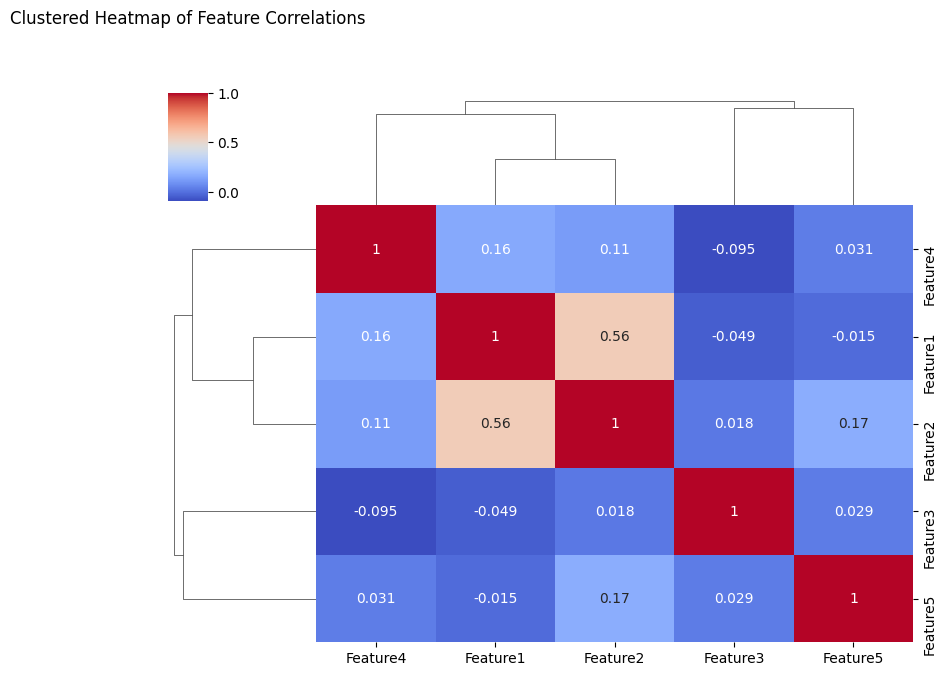

In [22]:
# Q18

# compute correlation matrix
corr_matrix = imb_data.drop('Target', axis=1).corr()
print(corr_matrix)

# clustered heatmap
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', figsize=(8,6))
plt.title('Clustered Heatmap of Feature Correlations', pad=50)
plt.show()

**Q19.**  
Using Iris dataset, create grouped boxplots of petal_length by species. Interpret which species differ most.  

**Q20.**  
Create an exploratory dashboard for Iris dataset including correlation heatmap, pairplot, and grouped boxplots. Summarize key findings.  


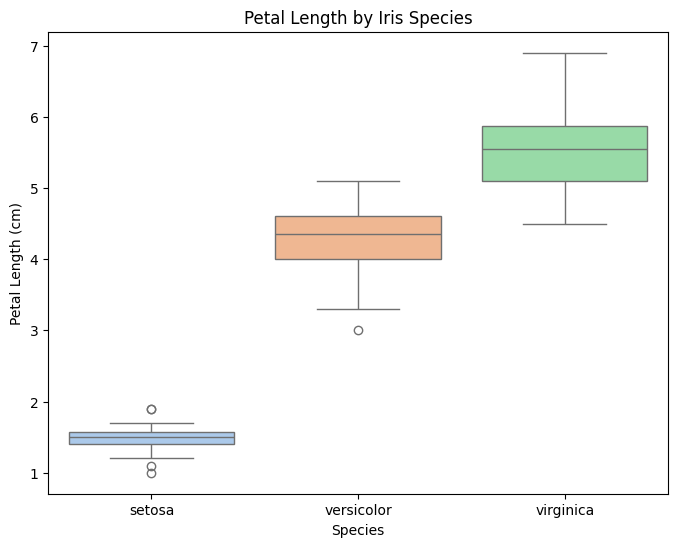

In [23]:
# Q19

# grouped boxplot of petal_length by species
plt.figure(figsize=(8,6))
sns.boxplot(x='species', y='petal_length', data=iris, hue='species', palette='pastel', dodge=False, legend=False)
plt.title('Petal Length by Iris Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

Interpretation:
* Setosa: Much smaller petal lengths, clearly separated from the other species.

* Versicolor and Virginica: Overlapping petal lengths, but Virginica generally has larger petals than Versicolor.

Conclusion: Setosa differs most from the other two species, while Versicolor and Virginica are closer but still distinguishable.

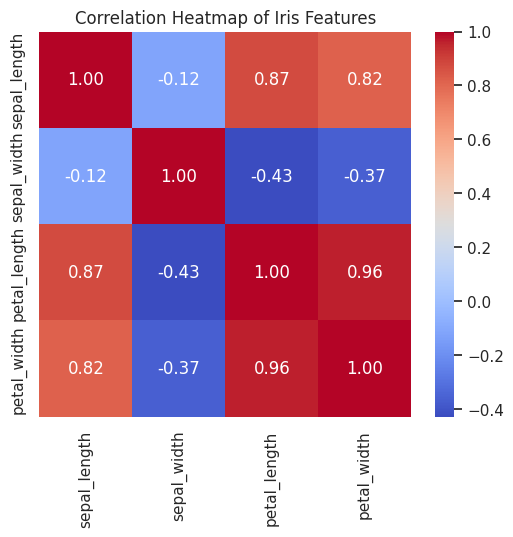

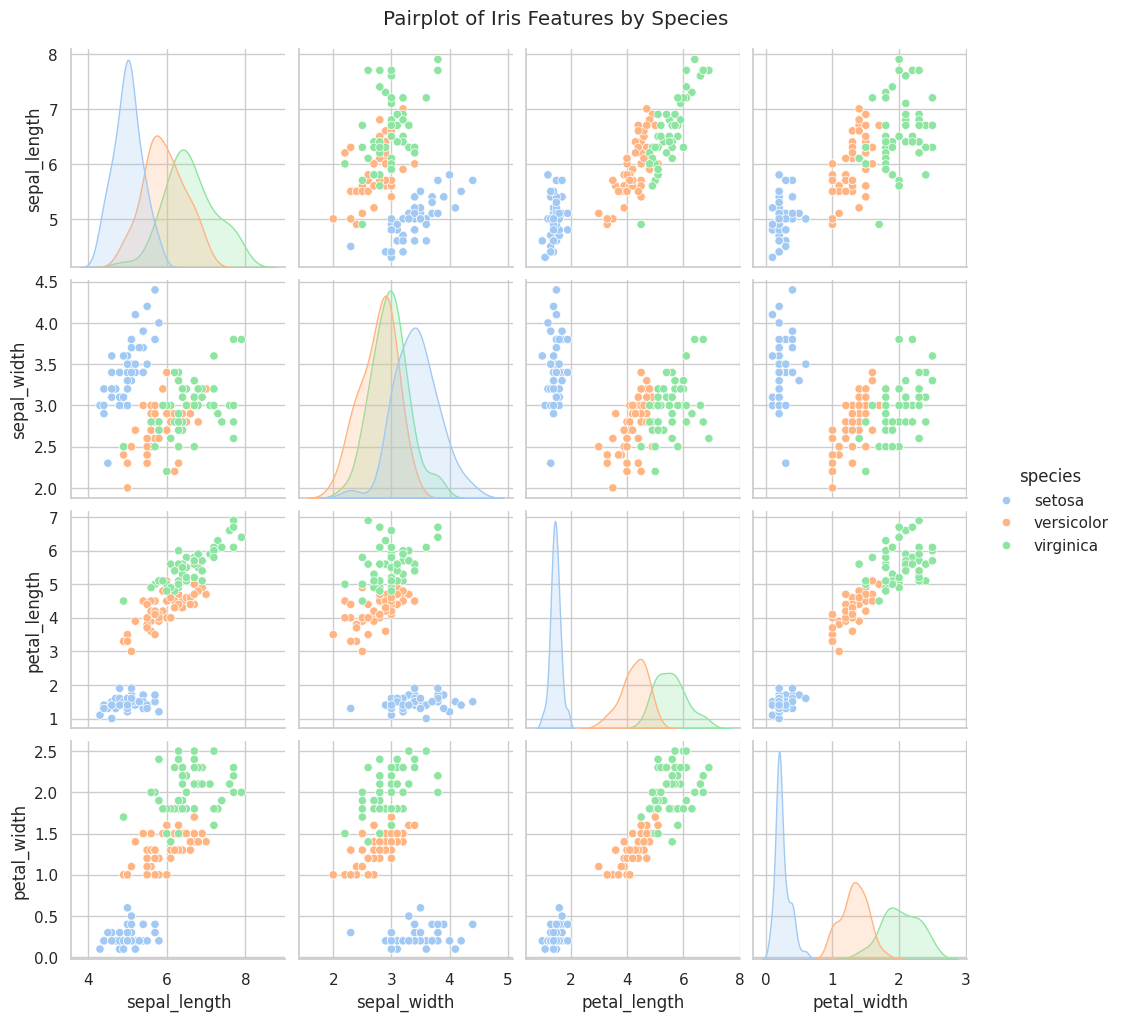

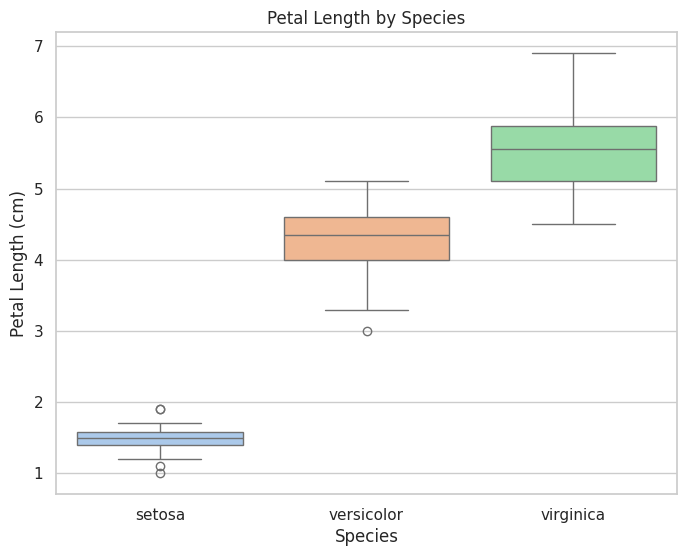

In [24]:
# Q20

# set style
sns.set(style="whitegrid")

# correlation Heatmap
plt.figure(figsize=(6,5))
corr = iris.drop('species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Iris Features')
plt.show()

# pairplot
sns.pairplot(iris, hue='species', palette='pastel', diag_kind='kde')
plt.suptitle('Pairplot of Iris Features by Species', y=1.02)
plt.show()

# grouped Boxplots (Petal Length by Species)
plt.figure(figsize=(8,6))
sns.boxplot(x='species', y='petal_length', data=iris, hue='species', palette='pastel', dodge=False, legend=False)
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

Key Findings:
* Correlations: Petal length and width are strongly related, while sepal features are only moderately correlated.

* Pairplot: Setosa clearly stands out, while Versicolor and Virginica overlap a bit but can still be told apart using petal size.

* Boxplots: Setosa has the smallest petals, Virginica the largest, and Versicolor is in between.

Conclusion: Petal measurements are the most useful for telling species apart, while sepal measurements are less distinctive.